# Quantum volume data and analysis 

This notebook contains an overview of loading and viewing Quantum Volume Test (QVT) data for Quantinuum H2-1. It requires qiskit==0.36.1 and qiskit-ignis.

## Loading QVT Data
Each QV data file is saved as a dictionary in a json file with five keys:
- `qv_circs_nomeas`: list of qasm for each qv circuit without optimization and no final measurement
- `qv_circs`: list of qasm for each qv circuit in same order as `qv_circs_nomeas`
- `raw_results`: list of outputs from each shot of each qv circuit in same order as `qv_circs_nomeas`
- `heavy_outputs`: frequency of observed heavy output counts for each circuit in same order as `qv_circs_nomeas` 
- `heavy_ideal`: probability of heavy output without errors in same order as `qv_circs_nomeas`

Available datasets:
- `'n15_H2-1_raw_results.json'`: QV 32,768 passed on 04/10/2023
- `'n16_H2-1_raw_results.json'`: QV 65,536 passed on 04/18/2023

In [1]:
import pathlib
import json

nqubits = 15
machine = 'H2-1'

file_name = f'n{nqubits}_{machine}_raw_results.json'
data_dir = pathlib.Path.cwd().parent.joinpath('quantum_volume/data')

with open(data_dir.joinpath(file_name), 'r') as f:
    data = json.load(f)

We can also load each pickle file and directly convert to a Qiskit `QVFitter` object.

In [2]:
from loading_functions import load_fitter

qv_fitter = load_fitter(machine, nqubits)
print(f'Measured HOP = {qv_fitter.ydata[0][0]}')

Measured HOP = 0.7094


## Count the number of gates

In [3]:
from utils import gate_counts
import numpy as np

counts_nomeas = gate_counts(data['qv_circs_nomeas'])
counts = gate_counts(data['qv_circs'])

print(f'TQ gates (no optimization) = {np.mean(counts_nomeas["cx"])}')
print(f'TQ gates (w/ optimization) = {np.mean(counts["rzz"])}')

TQ gates (no optimization) = 315.0
TQ gates (w/ optimization) = 243.22


## Plot Circuit Index vs. Heavy Output Frequency

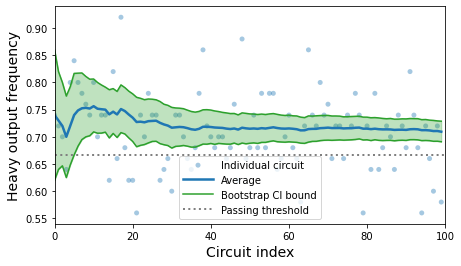

In [4]:
from plotting_functions import success_v_time

success_v_time(
    qv_fitter, 
    nqubits, 
    original_ci=False,
    bootstrap_ci=True,
    fill_range=True
)

<div align="center"> &copy; 2023 by Quantinuum. All Rights Reserved. </div>